In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [5]:
bank_df = pd.read_csv(r"C:\Users\omkar\OneDrive\Desktop\Datasets\bank_transaction1.csv")

In [6]:
df = bank_df.copy()

In [7]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T950255,C8211536,15/4/94,M,GURGAON,6054.68,10/9/16,204205,230.0
1,T348456,C1724521,11/7/88,F,EAST GODAVARI,650.38,15/8/16,130839,50.0
2,T179226,C7711118,28/2/88,M,OFFICE PURBA MEDINIPUR,9246.98,4/8/16,220538,100.0
3,T37509,C2240753,13/8/73,M,CHENNAI,57806.21,27/9/16,90913,563.0
4,T473137,C5248755,29/9/68,M,RAJKOT,1044669.31,21/8/16,183050,44.0


In [8]:
df.shape

(1000, 9)

In [9]:
# It has 1000 rows and 9 columns

In [10]:
df.CustomerID.nunique()

1000

In [11]:
# we will drop TransactionID and CustomerID column because each row is unique so that there is no pattern.

In [12]:
df.drop(columns=['TransactionID','CustomerID'],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerDOB              997 non-null    object 
 1   CustGender               999 non-null    object 
 2   CustLocation             1000 non-null   object 
 3   CustAccountBalance       998 non-null    float64
 4   TransactionDate          1000 non-null   object 
 5   TransactionTime          1000 non-null   int64  
 6   TransactionAmount (INR)  1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [14]:
# Convert the columns into proper formats

In [15]:
df.rename(columns= {'TransactionAmount (INR)':'TransactionAmount'},inplace=True)

In [16]:
df['CustomerDOB']  = pd.to_datetime(df['CustomerDOB'],errors = 'raise')

In [17]:
# pd.set_option('display.max_rows',None)
pd.reset_option('display.max_rows')


In [18]:
df['TransactionDate']  = pd.to_datetime(df['TransactionDate'],errors = 'raise')

In [19]:
df['TransactionDate'].dt.year.nunique() 

1

In [20]:
#2016 is the only one year which is available as the trasaction date, So Considering 2016 year is the buiding or analysis for this dataset.

In [66]:
drop_id = df[df['CustomerDOB'].dt.year > 2016].index
drop_id

Index([  3,   4,  14,  48,  61,  69, 115, 121, 123, 151, 161, 173, 195, 237,
       247, 248, 261, 264, 269, 284, 291, 292, 302, 309, 372, 377, 424, 431,
       455, 461, 466, 484, 500, 506, 531, 533, 541, 546, 577, 595, 608, 609,
       610, 613, 631, 633, 634, 640, 645, 655, 666, 677, 684, 699, 716, 719,
       721, 738, 743, 753, 761, 779, 790, 796, 808, 825, 838, 840, 848, 853,
       858, 862, 865, 887, 892, 920, 922, 927, 946, 960, 969, 973, 998],
      dtype='int64')

In [22]:
# 83 rows are considered as data entry errors as per customer DOB,Considering age as the important feature for the clustering in this case.
# Since we don't have correct data for the data entry errors will drop these rows further.


In [23]:
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'].astype(str).str.zfill(6), format='%H%M%S').dt.time

In [24]:
# df.drop(columns=['Formatted_Time'],inplace=True)

In [25]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
0,1994-04-15,M,GURGAON,6054.68,2016-10-09,20:42:05,230.0
1,1988-11-07,F,EAST GODAVARI,650.38,2016-08-15,13:08:39,50.0
2,1988-02-28,M,OFFICE PURBA MEDINIPUR,9246.98,2016-04-08,22:05:38,100.0
3,2073-08-13,M,CHENNAI,57806.21,2016-09-27,09:09:13,563.0
4,2068-09-29,M,RAJKOT,1044669.31,2016-08-21,18:30:50,44.0


In [26]:
df.any()==' '

CustomerDOB           False
CustGender            False
CustLocation          False
CustAccountBalance    False
TransactionDate       False
TransactionTime       False
TransactionAmount     False
dtype: bool

In [27]:
# Entire dataset does't have empty strings

In [28]:
df.isnull().sum() 

CustomerDOB           3
CustGender            1
CustLocation          0
CustAccountBalance    2
TransactionDate       0
TransactionTime       0
TransactionAmount     0
dtype: int64

In [31]:
# Since null values are in less in numbers filling null values to corresponding mean and median values

In [36]:
# df['CustomerDOB'].fillna(df['CustomerDOB'].mode()[0],inplace=True)
# df['CustGender'].fillna(df['CustGender'].mode()[0],inplace=True)
# df['CustAccountBalance'].fillna(df['CustAccountBalance'].median(),inplace=True)

In [37]:
df.isnull().sum()

CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
dtype: int64

In [67]:
# By considering 2016 as the base year for calucating the age of the customer.Dropping the wrong data if the year is greater than 2016

In [68]:
df['CustomerDOB'].dt.year.unique()

array([1994, 1988, 2073, 2068, 1993, 1980, 1992, 1991, 1800, 1976, 2072,
       1983, 1982, 1989, 1986, 1996, 1979, 1984, 1975, 1977, 1987, 1985,
       1990, 1978, 2070, 2071, 1995, 1981, 1997, 2059, 2053, 2065, 2043,
       2074, 2062, 2057, 2052, 2069, 2055, 2051, 2067, 2064, 2060, 2002,
       2066, 2063, 2056, 1998, 2050, 2027, 2001, 1999, 2058, 2061, 2046,
       2047])

In [69]:
df.drop(index=drop_id,inplace=True)

In [70]:
df['CustomerDOB'].dt.year.unique()

array([1994, 1988, 1993, 1980, 1992, 1991, 1800, 1976, 1983, 1982, 1989,
       1986, 1996, 1979, 1984, 1975, 1977, 1987, 1985, 1990, 1978, 1995,
       1981, 1997, 2002, 1998, 2001, 1999])

In [71]:
df.shape

(917, 7)

In [73]:
df['age'] = 2016-df['CustomerDOB'].dt.year

In [74]:
df['CustLocation'].unique()

array(['GURGAON', 'EAST GODAVARI', 'OFFICE PURBA MEDINIPUR', 'DIBRUGARH',
       'HYDERABAD', 'NOIDA', 'DELHI', 'AHMEDABAD', 'CHENNAI', 'NASIK',
       'BANGALORE', 'VADODARA', 'SRIPERUMBUDUR TAL KANCHIPURAM DIST',
       'GWALIOR', 'NELLORE', 'PANIPAT', 'GHAZIABAD', 'GUNTUR',
       'JALPAIGURI', 'NORTH 24 PARGANAS', 'FARIDABAD', 'KASHIPUR',
       'NEW DELHI', 'SRINAGAR', 'RANGA REDDY', 'MUMBAI', 'ROAD BANGALORE',
       'MOOSAPET HYDERABAD', 'NAVI MUMBAI NERUL NODE 3 THANE', 'INDORE',
       'ALWAR', 'GUWAHATI', 'BANGLORE', 'SONITPUR', 'ASHOK NAGAR MUMBAI',
       'AMRITSAR', 'RAMPUR', 'BAGAHA', 'SAS NAGAR MOHALI', 'NOKHA',
       'ARNI', 'SHOWROOM CAMP PUNE PUNE', 'KOLHAPUR', 'KOCHIIN',
       'BAHADURGARH', 'JAMNAGAR', 'PUMP WANWADI HAVELI PUNE',
       'AHMEDNAGAR', 'ROAD VARTHUR HOBLI BANGALORE',
       'MARKS SCHOOL NEW DELHI', 'PATHANKOT', 'INDIRANAGAR CHENNAI',
       'KALYANI', 'PUNE', 'KOLKATA', 'MUZAFFARPUR', 'BAMBOLIM',
       'PAREL MUMBAI', 'BHIWANI', 'THANE', 'BAGHPAT'

In [91]:
df['TransactionTime'] = pd.to_datetime(df['TransactionTime'], format='%H:%M:%S', errors='raise')

In [93]:
df['Transaction_month'] = df['TransactionDate'].dt.month
df['Transaction_day'] = df['TransactionDate'].dt.day
df['TransactionTime_hour'] = df['TransactionTime'].dt.hour

In [98]:
# df.drop(columns=['CustomerDOB','TransactionDate','TransactionTime'],inplace=True)
df.rename(columns={'age':'Age'},inplace=True)

In [99]:
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour
0,M,GURGAON,6054.68,230.0,22,10,9,20
1,F,EAST GODAVARI,650.38,50.0,28,8,15,13
2,M,OFFICE PURBA MEDINIPUR,9246.98,100.0,28,4,8,22
5,M,DIBRUGARH,4138.66,30.0,23,6,9,10
6,M,HYDERABAD,429009.04,2755.0,36,8,15,14


## Exploratory Data Analysis

In [100]:
df.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour'],
      dtype='object')

In [39]:
continuous = ['CustAccountBalance', 'TransactionAmount']
categorical =['CustGender', 'CustLocation',]
Discreate = ['Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour']

In [40]:
df[continuous].describe()

,CustAccountBalance,TransactionAmount
count,1.000000e+03,1000.00000
mean,8.651876e+04,1394.32779
std,3.223778e+05,5647.75488
min,4.000000e-02,1.00000
25%,4.411835e+03,129.00000
50%,1.594728e+04,369.00000
75%,5.232508e+04,1056.95000
max,4.911718e+06,104070.00000


In [42]:
df['CustAccountBalance'].min(),df['CustAccountBalance'].max()

(0.04, 4911718.1)

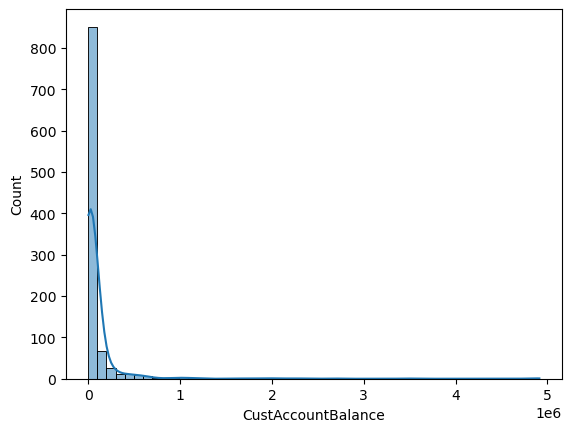

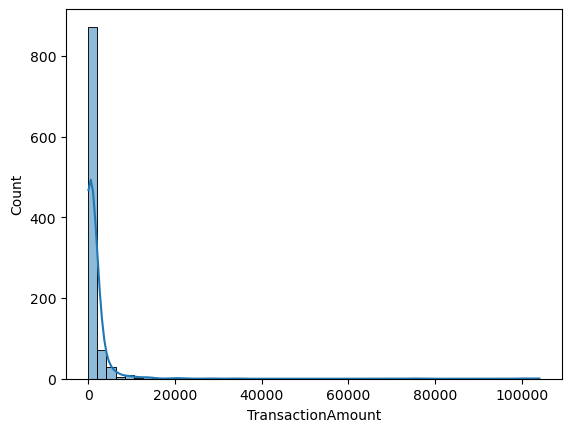

In [52]:
sns.histplot(df['CustAccountBalance'],kde=True,bins=50)
plt.show()
sns.histplot(df['TransactionAmount'],kde=True,bins=50)
plt.show()

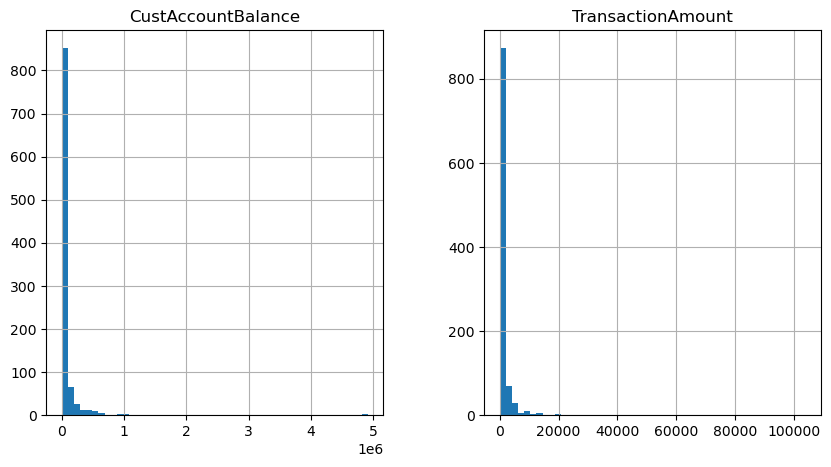

In [60]:
df[continuous].hist(bins=50,figsize=(10,5))
plt.show()

In [61]:
# Both two features are right skewed and more density available at initial part and outliers are also present.

In [102]:
df[continuous].corr()

,CustAccountBalance,TransactionAmount
CustAccountBalance,1.00000,0.13647
TransactionAmount,0.13647,1.00000


In [103]:
# There is no proper relation between CustAccountBalance and TransactionAmount bit it positive

## Data Wrangling

In [106]:
X = df.copy()

In [107]:
X.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour
0,M,GURGAON,6054.68,230.0,22,10,9,20
1,F,EAST GODAVARI,650.38,50.0,28,8,15,13
2,M,OFFICE PURBA MEDINIPUR,9246.98,100.0,28,4,8,22
5,M,DIBRUGARH,4138.66,30.0,23,6,9,10
6,M,HYDERABAD,429009.04,2755.0,36,8,15,14


In [108]:
X.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour'],
      dtype='object')

## Feature Scalling

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['CustAccountBalance', 'TransactionAmount','Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour']] = sc.fit_transform(X[['CustAccountBalance', 'TransactionAmount','Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour']])

In [110]:
X

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour
0,M,GURGAON,-0.248101,-0.207657,-0.394600,1.007754,-0.760901,0.894730
1,F,EAST GODAVARI,-0.267601,-0.245388,-0.257128,0.225604,0.041875,-0.520566
2,M,OFFICE PURBA MEDINIPUR,-0.236583,-0.234907,-0.257128,-1.338696,-0.894697,1.299101
5,M,DIBRUGARH,-0.255015,-0.249581,-0.371688,-0.556546,-0.760901,-1.127122
6,M,HYDERABAD,1.277985,0.321636,-0.073833,0.225604,0.041875,-0.318381
...,...,...,...,...,...,...,...,...
994,F,BENGALURU,-0.250665,-0.234907,-0.394600,0.225604,1.379834,-0.318381
995,F,IMPHAL WEST,-0.103095,-0.212478,-0.348776,0.225604,2.182610,-0.520566
996,M,JAIPUR,-0.261520,-0.245388,-0.394600,1.007754,-0.760901,1.501286
997,M,ETAWAH,-0.249286,-0.245388,-0.394600,-0.165471,-0.894697,-1.329307


## Feature Encoding

## one-hot encoding 

In [114]:
X['CustGender'] = pd.get_dummies(X['CustGender'],drop_first=True,dtype = int)

In [115]:
X

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour
0,1,GURGAON,-0.248101,-0.207657,-0.394600,1.007754,-0.760901,0.894730
1,0,EAST GODAVARI,-0.267601,-0.245388,-0.257128,0.225604,0.041875,-0.520566
2,1,OFFICE PURBA MEDINIPUR,-0.236583,-0.234907,-0.257128,-1.338696,-0.894697,1.299101
5,1,DIBRUGARH,-0.255015,-0.249581,-0.371688,-0.556546,-0.760901,-1.127122
6,1,HYDERABAD,1.277985,0.321636,-0.073833,0.225604,0.041875,-0.318381
...,...,...,...,...,...,...,...,...
994,0,BENGALURU,-0.250665,-0.234907,-0.394600,0.225604,1.379834,-0.318381
995,0,IMPHAL WEST,-0.103095,-0.212478,-0.348776,0.225604,2.182610,-0.520566
996,1,JAIPUR,-0.261520,-0.245388,-0.394600,1.007754,-0.760901,1.501286
997,1,ETAWAH,-0.249286,-0.245388,-0.394600,-0.165471,-0.894697,-1.329307


## one-hot encoding with multiple features

In [120]:
# Get the top most frequent categories for the CustLocation
top_10 = X.CustLocation.value_counts().sort_values(ascending =False).head(10).index

In [121]:
top_10

Index(['MUMBAI', 'BANGALORE', 'GURGAON', 'NEW DELHI', 'DELHI', 'PUNE', 'NOIDA',
       'CHENNAI', 'THANE', 'HYDERABAD'],
      dtype='object', name='CustLocation')

In [122]:
# Now make 10  binary variables
for label in top_10:
    X[label] = np.where(X['CustLocation']==label,1,0)


In [125]:
X.drop(columns=['CustLocation'],inplace=True)

In [126]:
X.head()

,CustGender,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,MUMBAI,BANGALORE,GURGAON,NEW DELHI,DELHI,PUNE,NOIDA,CHENNAI,THANE,HYDERABAD
0,1,-0.248101,-0.207657,-0.394600,1.007754,-0.760901,0.894730,0,0,1,0,0,0,0,0,0,0
1,0,-0.267601,-0.245388,-0.257128,0.225604,0.041875,-0.520566,0,0,0,0,0,0,0,0,0,0
2,1,-0.236583,-0.234907,-0.257128,-1.338696,-0.894697,1.299101,0,0,0,0,0,0,0,0,0,0
5,1,-0.255015,-0.249581,-0.371688,-0.556546,-0.760901,-1.127122,0,0,0,0,0,0,0,0,0,0
6,1,1.277985,0.321636,-0.073833,0.225604,0.041875,-0.318381,0,0,0,0,0,0,0,0,0,1


In [127]:
X.shape

(917, 17)

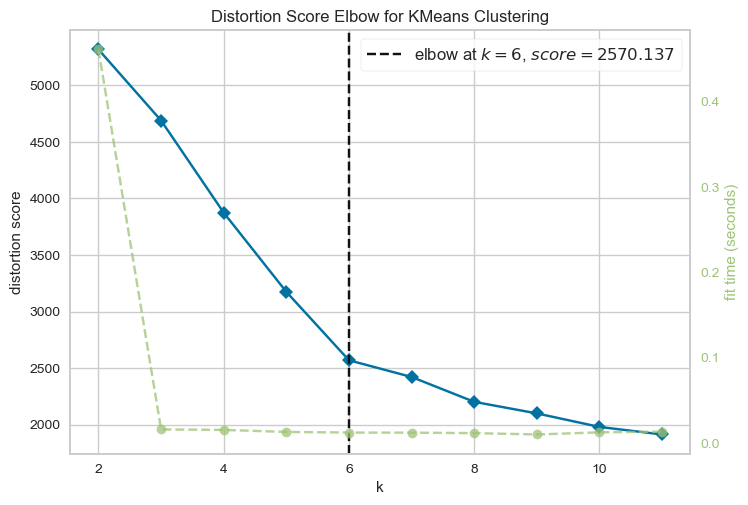

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [129]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Use the KElbowVisualizer to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(X)
visualizer.show()

In [131]:
#Fit a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [132]:
X['Cluster'] = kmeans.labels_

In [133]:
X

,CustGender,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,MUMBAI,BANGALORE,GURGAON,NEW DELHI,DELHI,PUNE,NOIDA,CHENNAI,THANE,HYDERABAD,Cluster
0,1,-0.248101,-0.207657,-0.394600,1.007754,-0.760901,0.894730,0,0,1,0,0,0,0,0,0,0,0
1,0,-0.267601,-0.245388,-0.257128,0.225604,0.041875,-0.520566,0,0,0,0,0,0,0,0,0,0,0
2,1,-0.236583,-0.234907,-0.257128,-1.338696,-0.894697,1.299101,0,0,0,0,0,0,0,0,0,0,5
5,1,-0.255015,-0.249581,-0.371688,-0.556546,-0.760901,-1.127122,0,0,0,0,0,0,0,0,0,0,5
6,1,1.277985,0.321636,-0.073833,0.225604,0.041875,-0.318381,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,-0.250665,-0.234907,-0.394600,0.225604,1.379834,-0.318381,0,0,0,0,0,0,0,0,0,0,1
995,0,-0.103095,-0.212478,-0.348776,0.225604,2.182610,-0.520566,0,0,0,0,0,0,0,0,0,0,1
996,1,-0.261520,-0.245388,-0.394600,1.007754,-0.760901,1.501286,0,0,0,0,0,0,0,0,0,0,0
997,1,-0.249286,-0.245388,-0.394600,-0.165471,-0.894697,-1.329307,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df['Cluster'] = X['Cluster']

In [138]:
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,Cluster
0,M,GURGAON,6054.68,230.0,22,10,9,20,0
1,F,EAST GODAVARI,650.38,50.0,28,8,15,13,0
2,M,OFFICE PURBA MEDINIPUR,9246.98,100.0,28,4,8,22,5
5,M,DIBRUGARH,4138.66,30.0,23,6,9,10,5
6,M,HYDERABAD,429009.04,2755.0,36,8,15,14,0
...,...,...,...,...,...,...,...,...,...
994,F,BENGALURU,5344.17,100.0,22,8,25,14,1
995,F,IMPHAL WEST,46243.15,207.0,24,8,31,13,1
996,M,JAIPUR,2335.67,50.0,22,10,9,23,0
997,M,ETAWAH,5726.27,50.0,22,7,8,9,0


In [141]:
df['Cluster'].value_counts()

Cluster
0    354
1    293
5    210
3     50
2      8
4      2
Name: count, dtype: int64

In [146]:
df.groupby('Cluster')[['CustAccountBalance','TransactionAmount']].describe()

CustAccountBalance                                          \
                     count          mean           std         min   
Cluster                                                              
0                    354.0  5.345800e+04  1.375923e+05        0.04   
1                    293.0  5.071184e+04  1.098957e+05        0.28   
2                      8.0  2.514711e+06  1.094529e+06  1601471.81   
3                     50.0  8.616735e+04  1.186504e+05       44.50   
4                      2.0  1.744125e+05  1.333030e+05    80153.05   
5                    210.0  4.785031e+04  1.197735e+05        0.48   

                                                              \
                  25%          50%           75%         max   
Cluster                                                        
0        4.405062e+03    13757.720  4.308296e+04  1193109.57   
1        4.228370e+03    12467.740  4.629416e+04   917781.13   
2        1.905312e+06  2083679.950  2.606627e+06  4825396.65   
3        9.862315e+03    29849.740  1.166851e+05   521743.54   
4        1.272828e+05   174412.515  2.215422e+05   268671.98   
5        3.319932e+03    11436.495  4.145824e+04  1041817.52   

        TransactionAmount                                                  \
                    count          mean           std       min       25%   
Cluster                                                                     
0                   354.0   1000.860763   2325.643161      1.00    140.00   
1                   293.0    953.862765   1948.905845      1.00    100.00   
2                     8.0   6727.818750  11202.740858     25.00   1792.50   
3                    50.0   1186.012200   1286.981255     60.00    399.75   
4                     2.0  89535.000000  20555.594129  75000.00  82267.50   
5                   210.0    920.657762   1651.527866      1.26    113.25   

                                        
               50%       75%       max  
Cluster                                 
0          317.940    931.75   27830.0  
1          295.000   1000.00   20000.0  
2         2302.375   4674.20   33700.0  
3          769.000   1567.50    6049.0  
4        89535.000  96802.50  104070.0  
5          316.500   1004.50   14435.0

In [147]:
df.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'Transaction_month', 'Transaction_day', 'TransactionTime_hour',
       'Cluster'],
      dtype='object')

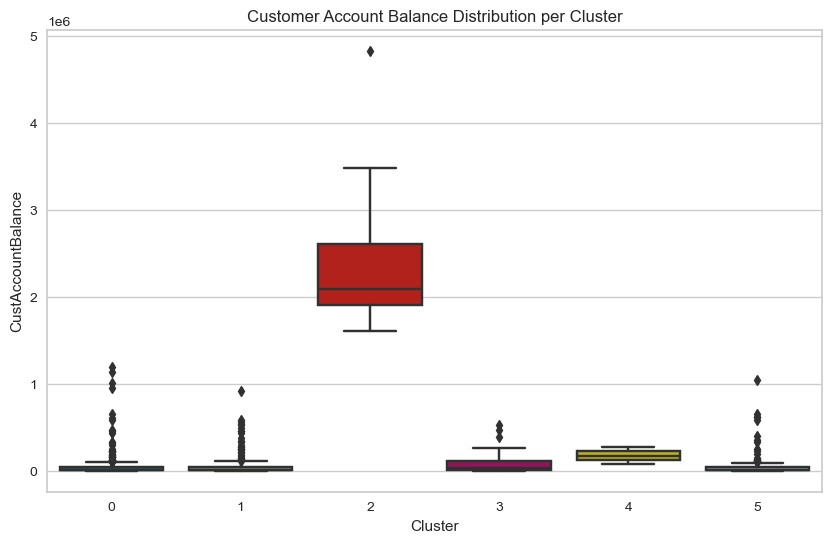

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='CustAccountBalance', data=df)
plt.title('Customer Account Balance Distribution per Cluster')
plt.show()


In [150]:
numeric_cols = df.select_dtypes(include=['number']).columns
df.groupby('Cluster')[numeric_cols].mean()


,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,Cluster
Cluster,,,,,,,
0,5.345800e+04,1000.860763,28.463277,9.084746,10.553672,15.593220,0.0
1,5.071184e+04,953.862765,28.641638,8.191126,23.928328,15.187713,1.0
2,2.514711e+06,6727.818750,79.500000,7.875000,20.500000,16.500000,2.0
3,8.616735e+04,1186.012200,216.000000,6.880000,14.920000,14.640000,3.0
4,1.744125e+05,89535.000000,26.500000,7.500000,8.500000,16.000000,4.0
5,4.785031e+04,920.657762,28.619048,3.661905,8.542857,16.266667,5.0


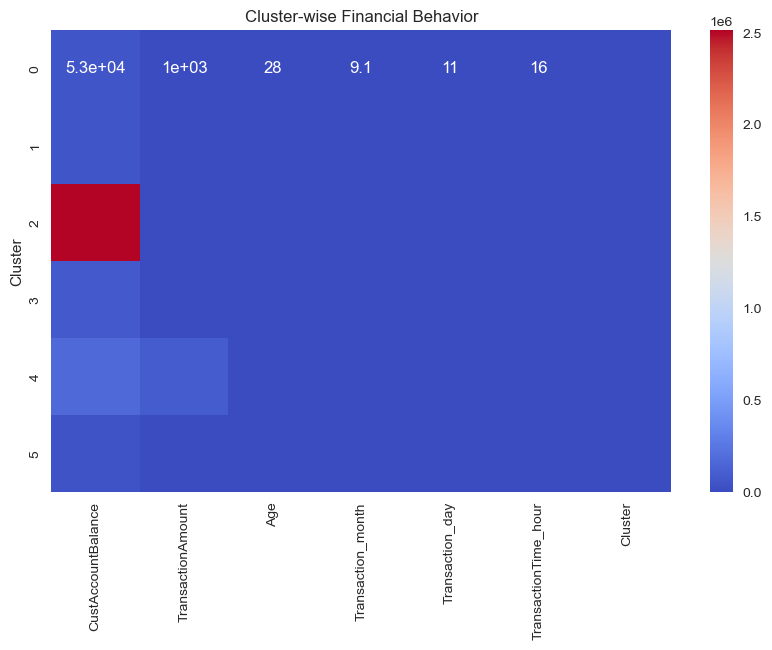

In [151]:
plt.figure(figsize=(10,6))
sns.heatmap(df.groupby('Cluster')[numeric_cols].mean(), cmap="coolwarm", annot=True)
plt.title("Cluster-wise Financial Behavior")
plt.show()


In [158]:
# sns.barplot(x=df['Cluster'],y=df['CustAccountBalance'].mean())
pd.options.display.float_format = '{:,.2f}'.format


In [165]:
cluster_balance = df.groupby('Cluster')['CustAccountBalance'].mean()
cluster_transaction = df.groupby('Cluster')['TransactionAmount'].mean()

In [164]:
cluster_balance

Cluster
0      53,458.00
1      50,711.84
2   2,514,710.95
3      86,167.35
4     174,412.51
5      47,850.31
Name: CustAccountBalance, dtype: float64

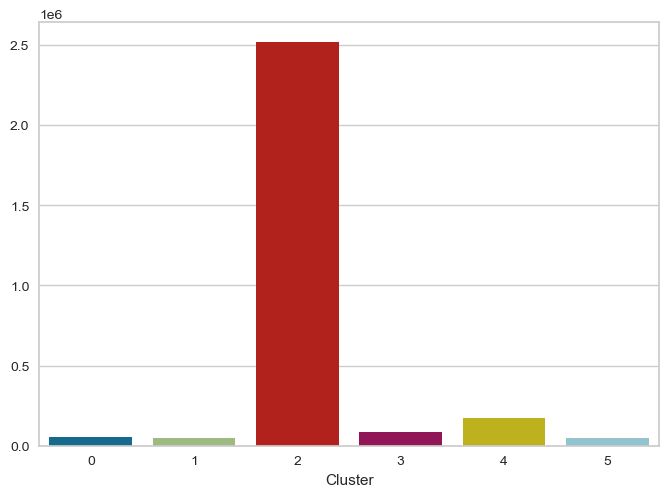

In [170]:
sns.barplot(x=cluster_balance.index,y=cluster_balance.values)
plt.show()

In [168]:
cluster_transaction

Cluster
0    1,000.86
1      953.86
2    6,727.82
3    1,186.01
4   89,535.00
5      920.66
Name: TransactionAmount, dtype: float64

<Axes: xlabel='Cluster'>

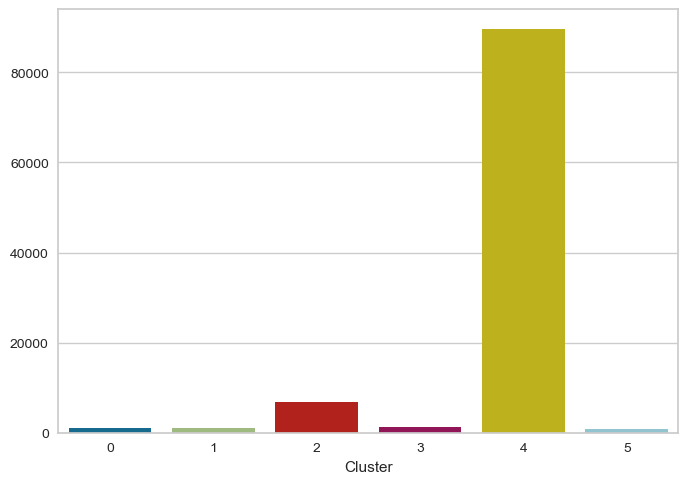

In [169]:
sns.barplot(x=cluster_transaction.index,y=cluster_transaction.values)

In [171]:
# Since it has too many outliers try with DBSCAN clustering

In [172]:
epsilons = np.linspace(2, 4, num=15) # If we need large density clusters then we use this one. In this case we got only two clusters. 
epsilons

array([2.        , 2.14285714, 2.28571429, 2.42857143, 2.57142857,
       2.71428571, 2.85714286, 3.        , 3.14285714, 3.28571429,
       3.42857143, 3.57142857, 3.71428571, 3.85714286, 4.        ])

In [173]:
min_samples = np.arange(3, 20, step=3)
min_samples

array([ 3,  6,  9, 12, 15, 18])

In [174]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(2.0, 3),
 (2.0, 6),
 (2.0, 9),
 (2.0, 12),
 (2.0, 15),
 (2.0, 18),
 (2.142857142857143, 3),
 (2.142857142857143, 6),
 (2.142857142857143, 9),
 (2.142857142857143, 12),
 (2.142857142857143, 15),
 (2.142857142857143, 18),
 (2.2857142857142856, 3),
 (2.2857142857142856, 6),
 (2.2857142857142856, 9),
 (2.2857142857142856, 12),
 (2.2857142857142856, 15),
 (2.2857142857142856, 18),
 (2.4285714285714284, 3),
 (2.4285714285714284, 6),
 (2.4285714285714284, 9),
 (2.4285714285714284, 12),
 (2.4285714285714284, 15),
 (2.4285714285714284, 18),
 (2.571428571428571, 3),
 (2.571428571428571, 6),
 (2.571428571428571, 9),
 (2.571428571428571, 12),
 (2.571428571428571, 15),
 (2.571428571428571, 18),
 (2.7142857142857144, 3),
 (2.7142857142857144, 6),
 (2.7142857142857144, 9),
 (2.7142857142857144, 12),
 (2.7142857142857144, 15),
 (2.7142857142857144, 18),
 (2.857142857142857, 3),
 (2.857142857142857, 6),
 (2.857142857142857, 9),
 (2.857142857142857, 12),
 (2.857142857142857, 15),
 (2.857142857142857, 

In [175]:
N = len(combinations)
N

90

In [179]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss

In [183]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters <= 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      # print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    # print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)
best_dict

{'best_epsilon': 2.857142857142857,
 'best_min_samples': 6,
 'best_labels': array([ 0,  0,  1,  1,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  2,  1, -1,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  2,  0, -1,  1,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  1,  2,  0,  0,  2,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  2,  0,  0,  0,  0,  0,  1,
         2,  2,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  1,  1,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
         0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  2,  1,  0,
         0,  

In [184]:
df['Cluster_Dbscan'] = best_dict['best_labels']

In [185]:
df['Cluster_Dbscan'].value_counts()

Cluster_Dbscan
 0    647
 1    210
 2     50
-1     10
Name: count, dtype: int64

In [186]:
df[df['Cluster_Dbscan']== -1]

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,Cluster,Cluster_Dbscan
28,M,KASHIPUR,"2,316,307.00","3,297.00",37,9,15,16,2,-1
34,F,FARIDABAD,"1,601,471.81","8,805.80",39,4,9,18,2,-1
58,F,NEW DELHI,"4,825,396.65","1,890.00",38,8,31,14,2,-1
117,F,AHMEDABAD,"1,945,840.79","1,500.00",216,8,19,8,2,-1
231,F,NEW DELHI,"268,671.98","104,070.00",25,9,9,19,4,-1
266,M,JODHPUR,"3,477,587.31","33,700.00",33,8,23,17,2,-1
294,M,MUZAFFARNAGAR,"1,992,399.53","2,088.75",26,9,25,20,2,-1
720,M,DELHI,"2,174,960.37","2,516.00",216,8,29,21,2,-1
819,F,BANGALORE,"80,153.05","75,000.00",28,6,8,13,4,-1
907,M,GURGAON,"1,783,724.15",25.00,31,9,13,18,2,-1


In [187]:
cluster_balance = df.groupby('Cluster_Dbscan')['CustAccountBalance'].mean()
cluster_transaction = df.groupby('Cluster_Dbscan')['TransactionAmount'].mean()

In [188]:
cluster_balance

Cluster_Dbscan
-1   2,046,651.26
 0      52,214.37
 1      47,850.31
 2      86,167.35
Name: CustAccountBalance, dtype: float64

In [189]:
cluster_transaction

Cluster_Dbscan
-1   23,289.25
 0      979.58
 1      920.66
 2    1,186.01
Name: TransactionAmount, dtype: float64

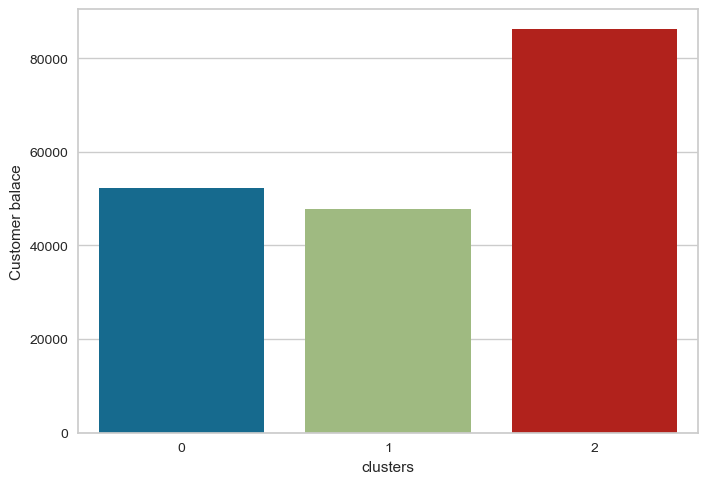

In [212]:
sns.barplot(x=cluster_balance.index[1:],y=cluster_balance.values[1:])
plt.xlabel("clusters")
plt.ylabel("Customer balace")
plt.show()

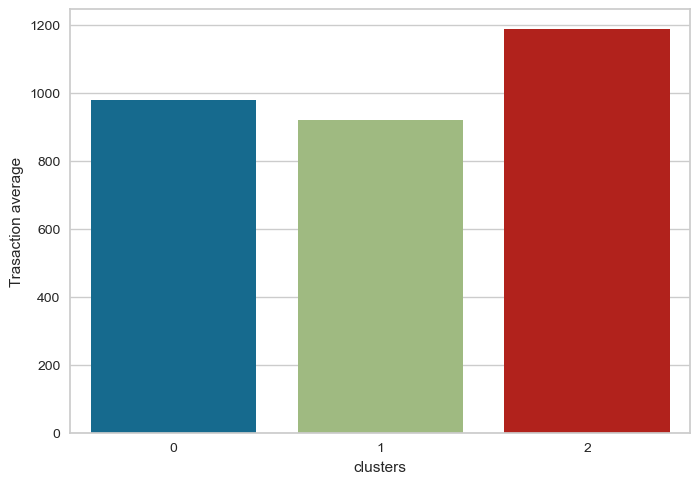

In [213]:
sns.barplot(x=cluster_transaction.index[1:],y=cluster_transaction.values[1:])
plt.xlabel("clusters")
plt.ylabel("Trasaction average")
plt.show()

In [211]:
df['Age'] = np.where(df['Age']>100,df['Age'].mode()[0],df['Age'])

In [217]:
df_without_outlier = df[df['Cluster_Dbscan'].isin([0,1,2])]

Cluster_Dbscan
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
Name: CustAccountBalance, dtype: object

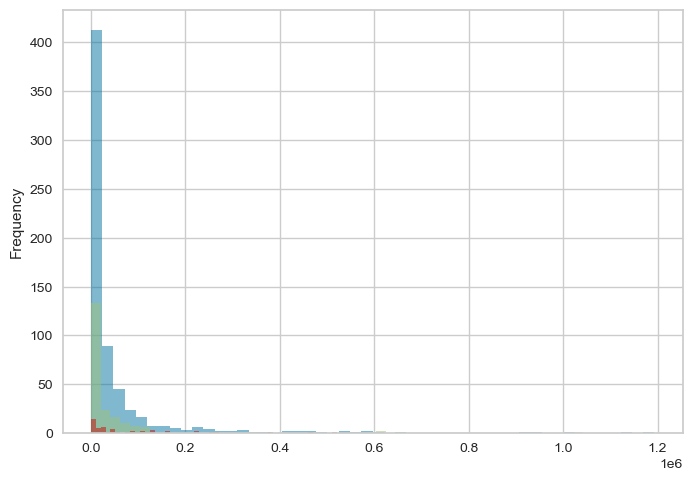

In [218]:
df_without_outlier.groupby('Cluster_Dbscan')['CustAccountBalance'].plot.hist(bins=50, alpha=0.5)

In [220]:
df

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,Transaction_month,Transaction_day,TransactionTime_hour,Cluster,Cluster_Dbscan,Frequent_Transaction_User
0,M,GURGAON,"6,054.68",230.00,22,10,9,20,0,0,False
1,F,EAST GODAVARI,650.38,50.00,28,8,15,13,0,0,False
2,M,OFFICE PURBA MEDINIPUR,"9,246.98",100.00,28,4,8,22,5,1,False
5,M,DIBRUGARH,"4,138.66",30.00,23,6,9,10,5,1,False
6,M,HYDERABAD,"429,009.04","2,755.00",36,8,15,14,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...
994,F,BENGALURU,"5,344.17",100.00,22,8,25,14,1,0,False
995,F,IMPHAL WEST,"46,243.15",207.00,24,8,31,13,1,0,False
996,M,JAIPUR,"2,335.67",50.00,22,10,9,23,0,0,False
997,M,ETAWAH,"5,726.27",50.00,22,7,8,9,0,0,False


In [219]:
transaction_threshold = df['TransactionAmount'].quantile(0.75)

# Define high-frequency customers
df['Frequent_Transaction_User'] = df['TransactionAmount'] > transaction_threshold

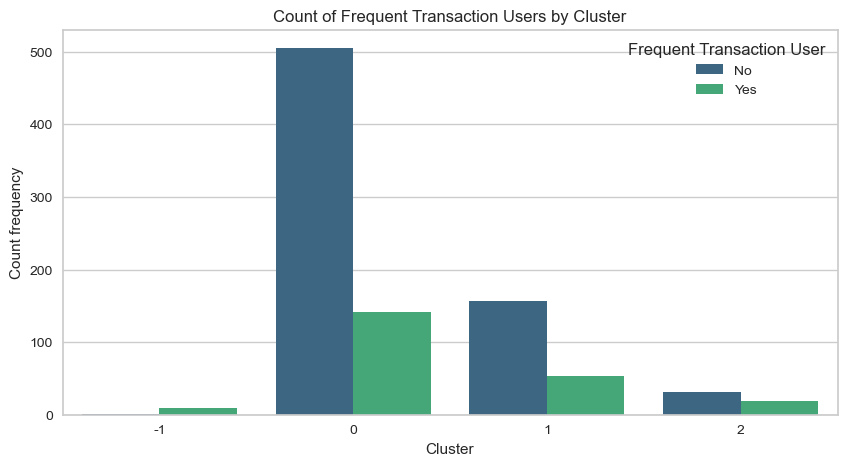

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert boolean values to string labels
df['Frequent_Transaction_User'] = df['Frequent_Transaction_User'].astype(str)

plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster_Dbscan', hue='Frequent_Transaction_User', data=df, palette='viridis')

plt.title("Count of Frequent Transaction Users by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count frequency")
plt.legend(title="Frequent Transaction User", labels=['No', 'Yes'])
plt.show()


## Cluster Classification: